In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
df1_original = pd.read_csv('account_value_ppo_finrl.csv')
df1_reproduced = pd.read_csv('finrl.csv')
df2_original = pd.read_csv('Gym_anytrade.csv')
df2_reproduced = pd.read_csv('account_value_ppo_gym_anytrading.csv')

In [10]:
df1_original

,date,account_value,std
0,2023-01-03,1.000000e+06,0.0
1,2023-01-04,1.000000e+06,0.0
2,2023-01-05,9.998554e+05,0.0
3,2023-01-06,1.000750e+06,0.0
4,2023-01-09,1.000805e+06,0.0
...,...,...,...
495,2024-12-20,1.548567e+06,0.0
496,2024-12-23,1.553313e+06,0.0
497,2024-12-24,1.571134e+06,0.0
498,2024-12-26,1.576090e+06,0.0


In [11]:

df1_reproduced

,date,account_value,std
0,2023-01-03,1.000000e+06,0.0
1,2023-01-04,1.000000e+06,0.0
2,2023-01-05,9.998554e+05,0.0
3,2023-01-06,1.000750e+06,0.0
4,2023-01-09,1.000833e+06,0.0
...,...,...,...
495,2024-12-20,1.584584e+06,0.0
496,2024-12-23,1.589441e+06,0.0
497,2024-12-24,1.607416e+06,0.0
498,2024-12-26,1.612499e+06,0.0


In [12]:
# df1o
df1o = pd.DataFrame()
df1o['Date'] = df1_original['date']
V0 = df1_original["account_value"].iloc[0]
df1o["cum_return"] = df1_original["account_value"] / V0 - 1.0

# df1r
df1r = pd.DataFrame()
df1r['Date'] = df1_reproduced['date']
V0 = df1_reproduced["account_value"].iloc[0]
df1r["cum_return"] = df1_reproduced["account_value"] / V0 - 1.0


df2o=pd.DataFrame()
df2o['Date']=df2_original['Date']
V0 = df2_original["total_profit"].iloc[0]
df2o["cum_return"] = df2_original["total_profit"] / V0 - 1.0

# df2r
df2r = pd.DataFrame()
df2r['Date'] = df2_reproduced['date']
V0 = df2_reproduced["account_value"].iloc[0]
df2r["cum_return"] = df2_reproduced["account_value"] / V0 - 1.0





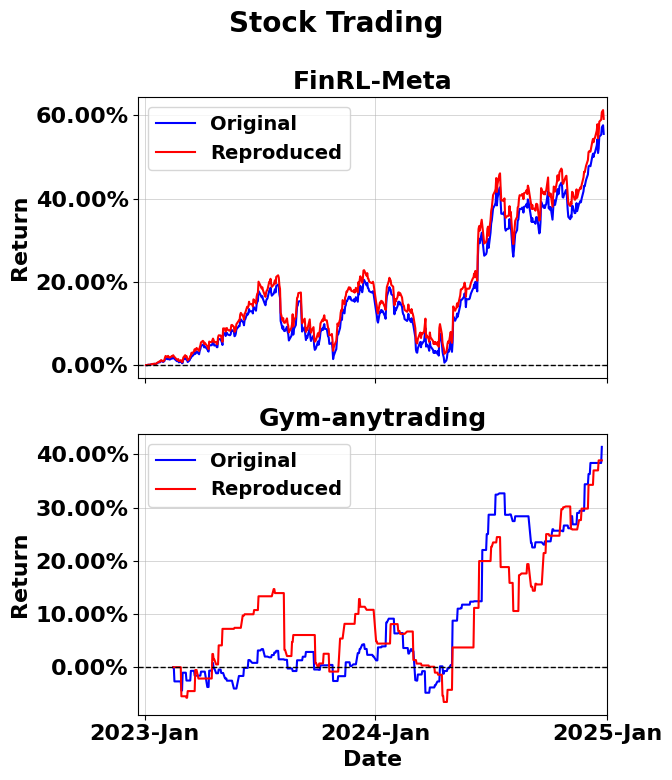

In [13]:
# -*- coding: utf-8 -*-
"""
Two percent-return plots (FinRL-Meta & Gym-anytrading)
"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

def prep(df, date_col="Date", ret_col="cum_return", label=None):
    s = (df.assign(**{date_col: pd.to_datetime(df[date_col])})
           .set_index(date_col)[ret_col]
           .astype(float))
    return s.rename(label) if label else s

# --- Project 1 (df1o / df1r) ---
s1o = prep(df1o, label="Original")
s1r = prep(df1r, label="Reproduced")
cmp1 = pd.concat([s1o, s1r], axis=1, join="inner").dropna()

# --- Project 2 (df2o / df2r) ---
s2o = prep(df2o, label="Original")
s2r = prep(df2r, label="Reproduced")
cmp2 = pd.concat([s2o, s2r], axis=1, join="inner").dropna()

# --- Shared x-axis setup ----------------------------------------------------
start_tick = pd.Timestamp("2023-01-01")
mid_tick   = pd.Timestamp("2024-01-01")
end_tick   = pd.Timestamp("2025-01-01")

left_pad_days = 10  # small whitespace before the first tick
x_left = start_tick - pd.Timedelta(days=left_pad_days)
x_right = end_tick  # keep right edge tight (or add a pad if you want)

plt.rcParams.update({
    "font.size": 16,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 18,
    "axes.titleweight": "bold",
    "legend.fontsize": 14
})

fig, axes = plt.subplots(2, 1, figsize=(7, 8), sharex=True)
fig.suptitle("Stock Trading", fontsize=20, fontweight="bold", y=0.98)

# === Top: FinRL-Meta (x-axis visible, no labels) ===
axes[0].plot(cmp1.index, cmp1["Original"], color="blue", linewidth=1.5, label="Original")
axes[0].plot(cmp1.index, cmp1["Reproduced"], color="red",  linewidth=1.5, label="Reproduced")
axes[0].axhline(0, color="black", linewidth=1, linestyle="--")
axes[0].set_title("FinRL-Meta")
axes[0].set_ylabel("Return")
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=2))
axes[0].grid(True, linewidth=0.6, alpha=0.6)
axes[0].legend(loc="upper left")
axes[0].set_xlim(x_left, x_right)
axes[0].tick_params(axis="x", labelbottom=False)  # keep ticks, hide labels

# === Bottom: Gym-anytrading (3 labels: Jan-2023, Jan-2024, Jan-2025) ===
axes[1].plot(cmp2.index, cmp2["Original"], color="blue", linewidth=1.5, label="Original")
axes[1].plot(cmp2.index, cmp2["Reproduced"], color="red",  linewidth=1.5, label="Reproduced")
axes[1].axhline(0, color="black", linewidth=1, linestyle="--")
axes[1].set_title("Gym-anytrading")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Return")
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=2))
axes[1].grid(True, linewidth=0.6, alpha=0.6)
axes[1].legend(loc="upper left")

# Full x-range with slight left gap; exactly three ticks
axes[1].set_xlim(x_left, x_right)
axes[1].set_xticks([start_tick, mid_tick, end_tick])
axes[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))

plt.tight_layout()
plt.show()


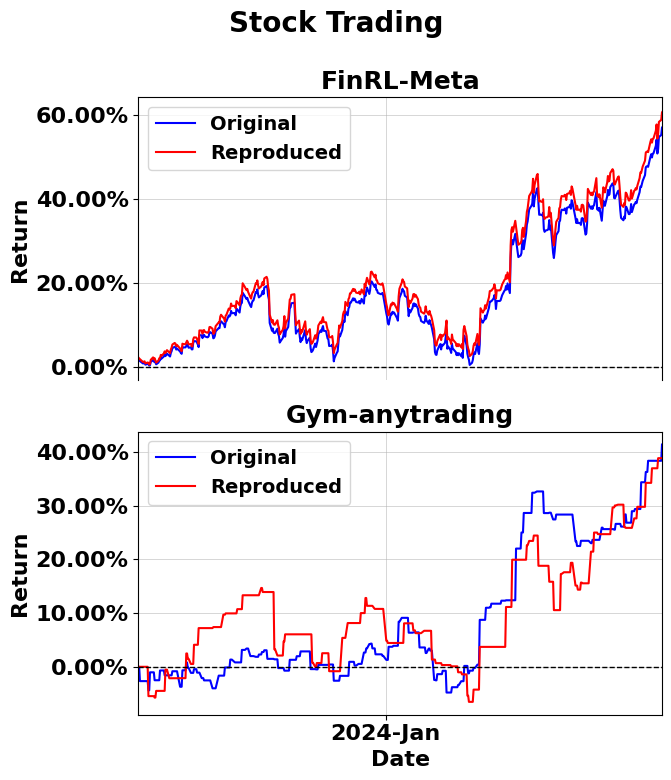

In [14]:
# -*- coding: utf-8 -*-
"""
Two percent-return plots (FinRL-Meta & Gym-anytrading)
- Compact width
- Large, bold fonts
- Original = blue (solid)
- Reproduced = red (solid)
- Percent y-axis (fractional input)
- 0% baseline dashed
"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

def main():
    # --- Set global font style ---
    plt.rcParams.update({
        "font.size": 16,
        "font.weight": "bold",
        "axes.labelweight": "bold",
        "axes.titlesize": 18,
        "axes.titleweight": "bold",
        "legend.fontsize": 14
    })

    # ---- inputs ----
    DATE_COL = "Date"
    RET_COL  = "cum_return"   # fractional return (0.10 -> 10%)

    # Project 1 (FinRL-Meta)
    s1o = df1o.assign(**{DATE_COL: pd.to_datetime(df1o[DATE_COL])}).set_index(DATE_COL)[RET_COL].rename("Original")
    s1r = df1r.assign(**{DATE_COL: pd.to_datetime(df1r[DATE_COL])}).set_index(DATE_COL)[RET_COL].rename("Reproduced")
    cmp1 = pd.concat([s1o, s1r], axis=1, join="inner").dropna()

    # Project 2 (Gym-anytrading)
    s2o = df2o.assign(**{DATE_COL: pd.to_datetime(df2o[DATE_COL])}).set_index(DATE_COL)[RET_COL].rename("Original")
    s2r = df2r.assign(**{DATE_COL: pd.to_datetime(df2r[DATE_COL])}).set_index(DATE_COL)[RET_COL].rename("Reproduced")
    cmp2 = pd.concat([s2o, s2r], axis=1, join="inner").dropna()

    # Use Project 2's full date span as the shared x-axis
    x_min, x_max = cmp2.index.min(), cmp2.index.max()

    # --- Plot with compact width ---
    fig, axes = plt.subplots(2, 1, figsize=(7, 8), sharex=True)
    fig.suptitle("Stock Trading", fontsize=20, fontweight="bold", y=0.98)

    # === Top: FinRL-Meta (no x ticks/labels) ===
    axes[0].plot(cmp1.index, cmp1["Original"], color="blue", linewidth=1.5, label="Original")
    axes[0].plot(cmp1.index, cmp1["Reproduced"], color="red",  linewidth=1.5, label="Reproduced")
    axes[0].axhline(0, color="black", linewidth=1, linestyle="--")
    axes[0].set_title("FinRL-Meta")
    axes[0].set_ylabel("Return")
    axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=2))
    axes[0].grid(True, linewidth=0.6, alpha=0.6)
    axes[0].legend(loc="upper left")
    axes[0].set_xlim(x_min, x_max)  # align with bottom
    axes[0].tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
    axes[0].spines["bottom"].set_visible(False)

    # === Bottom: Gym-anytrading (full x-axis visible) ===
    axes[1].plot(cmp2.index, cmp2["Original"], color="blue", linewidth=1.5, label="Original")
    axes[1].plot(cmp2.index, cmp2["Reproduced"], color="red",  linewidth=1.5, label="Reproduced")
    axes[1].axhline(0, color="black", linewidth=1, linestyle="--")
    axes[1].set_title("Gym-anytrading")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Return")
    axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=2))
    axes[1].grid(True, linewidth=0.6, alpha=0.6)
    axes[1].legend(loc="upper left")

    # Bottom x-axis ticks from the start date
    axes[1].set_xlim(x_min, x_max)
    axes[1].xaxis.set_major_locator(mdates.YearLocator(base=1, month=1, day=1))
    axes[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
